# Supervised Learning - Decision Tree and Random Forest Tree

## Build a decision tree & random forest model with diabetes data and identify the factors affecting the outcome.  

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

import sklearn.metrics as skmet

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# import the dataset
diabetes_data = pd.read_csv(r"D:\360digi\DS\Sharath\Decision_Tree_2_Master_Class\handson\Datasets_DT\Diabetes.csv")
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8    Class variable                768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [4]:
diabetes_data.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

In [5]:
diabetes_data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [6]:
diabetes_data.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Data Preprocessing

In [7]:
diabetes_data.isnull().sum()

 Number of times pregnant        0
 Plasma glucose concentration    0
 Diastolic blood pressure        0
 Triceps skin fold thickness     0
 2-Hour serum insulin            0
 Body mass index                 0
 Diabetes pedigree function      0
 Age (years)                     0
 Class variable                  0
dtype: int64

In [8]:
# Target variable categories

diabetes_data[' Class variable'].unique()

array(['YES', 'NO'], dtype=object)

In [9]:
diabetes_data[' Class variable'].value_counts()

NO     500
YES    268
Name:  Class variable, dtype: int64

In [10]:
diabetes_data.shape

(768, 9)

In [11]:
# Data split into Input and Output
X = diabetes_data.iloc[:, :8]
X

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [12]:
Y = diabetes_data[' Class variable']
Y

0      YES
1       NO
2      YES
3       NO
4      YES
      ... 
763     NO
764     NO
765     NO
766    YES
767     NO
Name:  Class variable, Length: 768, dtype: object

#### Separating Numeric and Non-Numeric columns

In [13]:
numeric_features = X.select_dtypes(exclude = ['object']).columns

In [14]:
numeric_features

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)'],
      dtype='object')

In [15]:
# categorical_features = X.select_dtypes(include=['object']).columns
# categorical_features

#### Outlier Analysis

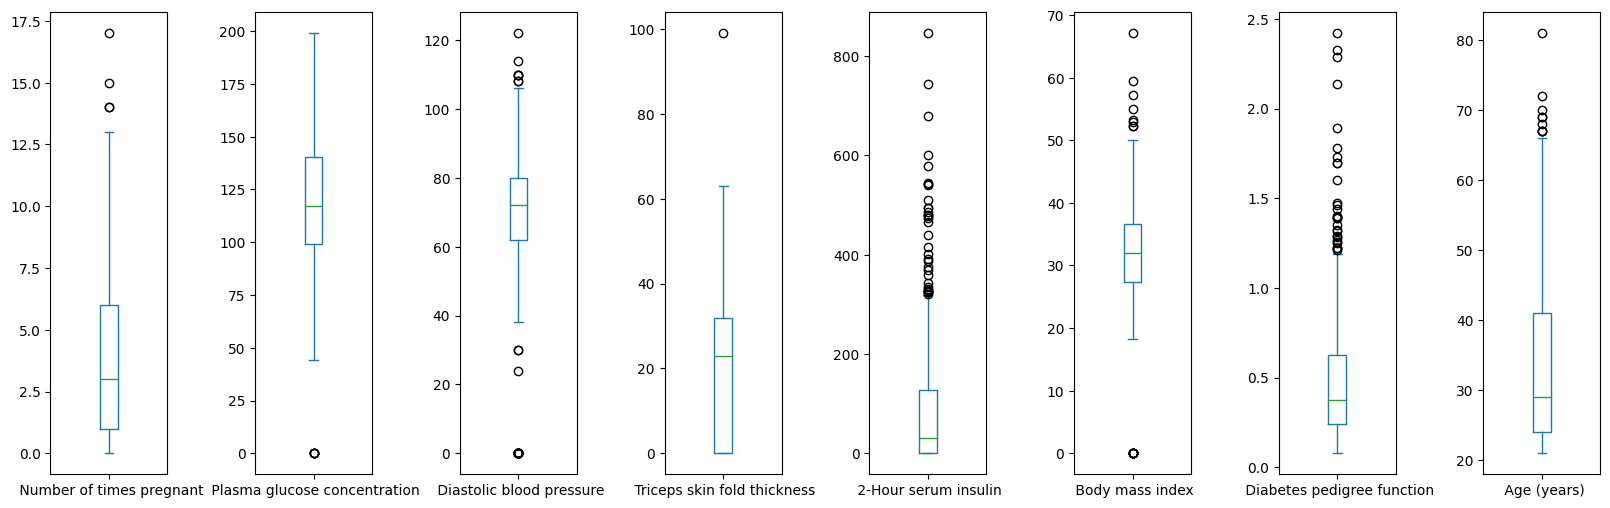

In [16]:
# Multiple boxplots in a single visualization.


X.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6)) 

# increase spacing between subplots
plt.subplots_adjust(wspace = .75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

In [17]:
X.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)'],
      dtype='object')

#### Winsorization

In [18]:
winsor = Winsorizer(capping_method = 'iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = [' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)'])

In [19]:
cl = winsor.fit(X[[' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)']])

In [20]:
X[[' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)']] = cl.transform(X[[' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)']])

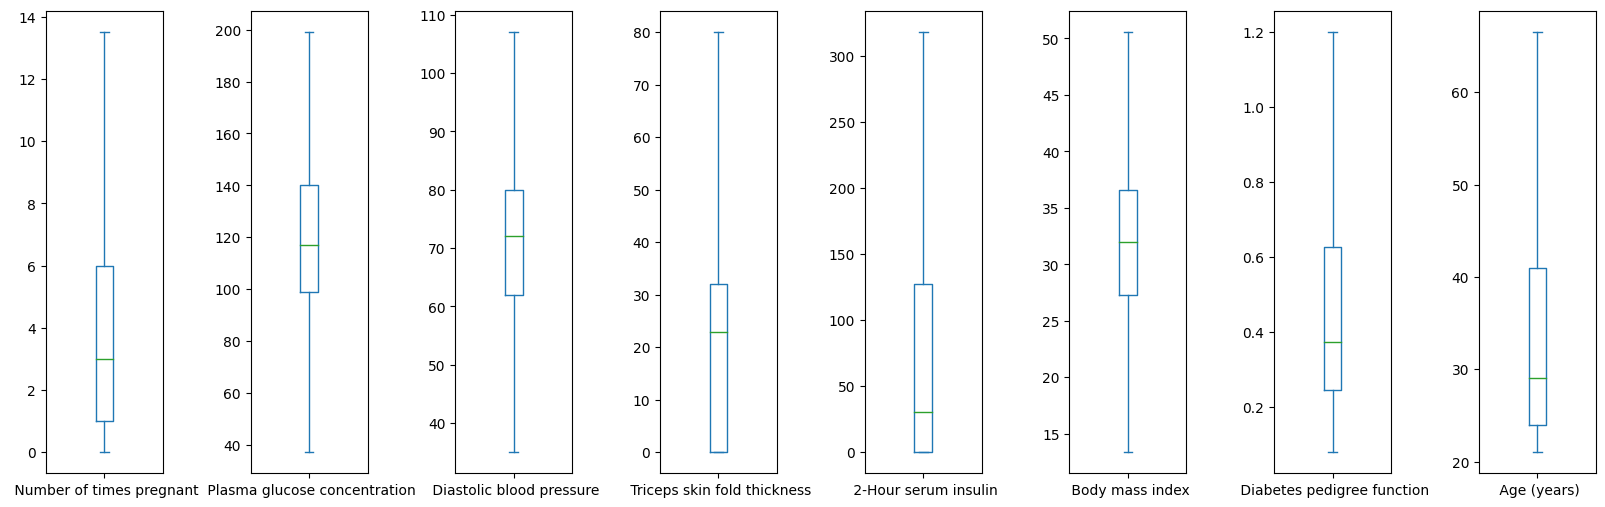

In [21]:
X.plot(kind = 'box', subplots = True, sharey = False, figsize = (20, 6)) 


# increase spacing between subplots
plt.subplots_adjust(wspace = 0.75) # ws is the width of the padding between subplots, as a fraction of the average Axes width.
plt.show()

#### MinMaxScaler to convert the magnitude of the columns to a range of 0 to 1

In [22]:
scale_pipeline = Pipeline([('scale', MinMaxScaler())])

In [23]:
preprocess_pipeline = ColumnTransformer([('scale', scale_pipeline, numeric_features )])

In [24]:
processed = preprocess_pipeline.fit(X)

In [25]:
X_norm = pd.DataFrame(processed.transform(X))
X_norm

,0,1,2,3,4,5,6,7
0,0.444444,0.684942,0.513889,0.4375,0.000000,0.544355,0.489305,0.637363
1,0.074074,0.295753,0.430556,0.3625,0.000000,0.356183,0.243316,0.219780
2,0.592593,0.901158,0.402778,0.0000,0.000000,0.267473,0.529412,0.241758
3,0.074074,0.320463,0.430556,0.2875,0.295481,0.396505,0.079323,0.000000
4,0.000000,0.616988,0.069444,0.4375,0.528094,0.799731,1.000000,0.263736
...,...,...,...,...,...,...,...,...
763,0.740741,0.394595,0.569444,0.6000,0.565815,0.525538,0.082888,0.923077
764,0.148148,0.524324,0.486111,0.3375,0.000000,0.630376,0.233512,0.131868
765,0.370370,0.518147,0.513889,0.2875,0.352063,0.345430,0.148841,0.197802
766,0.074074,0.549035,0.347222,0.0000,0.000000,0.450269,0.241533,0.571429


In [26]:
# Split data into train and test with Stratified sample technique

X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size = 0.2, stratify = Y, random_state = 0)

In [27]:
# Proportion of Target variable categories are consistent across train and test

print(Y_train.value_counts()/ 614)
print("\n")
print(Y_test.value_counts()/ 154)

NO     0.651466
YES    0.348534
Name:  Class variable, dtype: float64


NO     0.649351
YES    0.350649
Name:  Class variable, dtype: float64


## Decision Tree Model

In [28]:
model = DT(criterion = 'entropy')
# train the data with Decision tree model
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [29]:
# Predict the test data
preds = model.predict(X_test)
preds

array(['NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO',
       'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO',
       'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO

In [30]:
# Accuracy
print(accuracy_score(Y_test, preds))

0.7272727272727273


In [31]:
pd.crosstab(Y_test, preds, rownames = ['Actual'], colnames = ['Predictions'])

Predictions,NO,YES
Actual,,
NO,81,19
YES,23,31


[Text(0.5, 1.0, 'Sales Classification Confusion Matrix(Train)'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

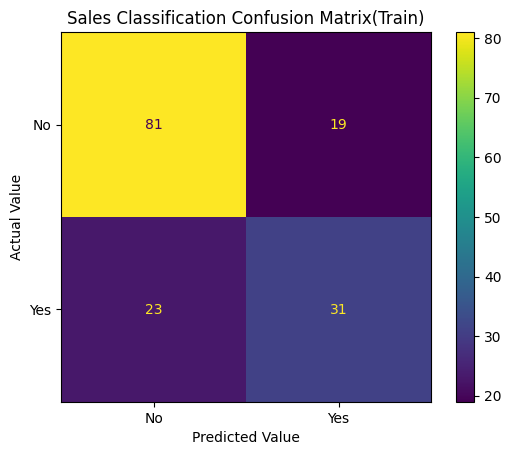

In [32]:
# Confusion Matrix - Heat Map
cm = skmet.confusion_matrix(Y_test, preds)
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cmplot.plot()
cmplot.ax_.set(title = 'Sales Classification Confusion Matrix(Train)', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

### Hyperparameter Optimization

In [33]:
# create a dictionary of all hyperparameters to be experimented
param_grid = { 'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 15)}

# Decision tree model
dtree_model = DT()

# GridsearchCV with cross-validation to perform experiments with parameters set
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv = 5, scoring = 'accuracy', return_train_score = False, verbose = 1)

In [34]:
# Train
dtree_gscv.fit(X_train, Y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='accuracy', verbose=1)

In [35]:
# The best set of parameter values
dtree_gscv.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [36]:
# Model with best parameter values
dtree_gscv.best_estimator_ 

DecisionTreeClassifier(max_depth=4)

In [37]:
# Model with best parameter values
DT_best = dtree_gscv.best_estimator_
DT_best

DecisionTreeClassifier(max_depth=4)

In [38]:
# Again predict on Test data

pred1 = DT_best.predict(X_test)
pred1

array(['NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES',
       'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO

In [39]:
pd.crosstab(Y_test, pred1,  rownames = ['Actual'], colnames = ['Predictions'])

Predictions,NO,YES
Actual,,
NO,82,18
YES,28,26


In [40]:
# Accuracy
print(accuracy_score(Y_test, pred1))

0.7012987012987013


[Text(0.5, 1.0, 'Sales Classification Confusion Matrix(Train)'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

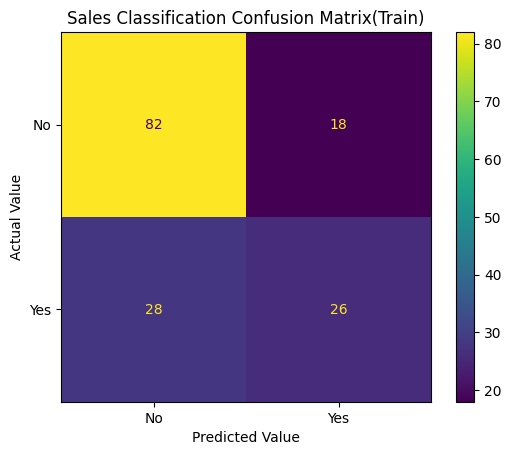

In [41]:
# Confusion Matrix - Heat Map
cm = skmet.confusion_matrix(Y_test, pred1)
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cmplot.plot()
cmplot.ax_.set(title = 'Sales Classification Confusion Matrix(Train)', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

In [42]:
import os
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

In [43]:
predictors = list(X.columns)
type(predictors)

list

In [44]:
dot_data = tree.export_graphviz(DT_best, filled = True, rounded = True, feature_names = predictors, class_names = ['Yes', 'No'], out_file = None)

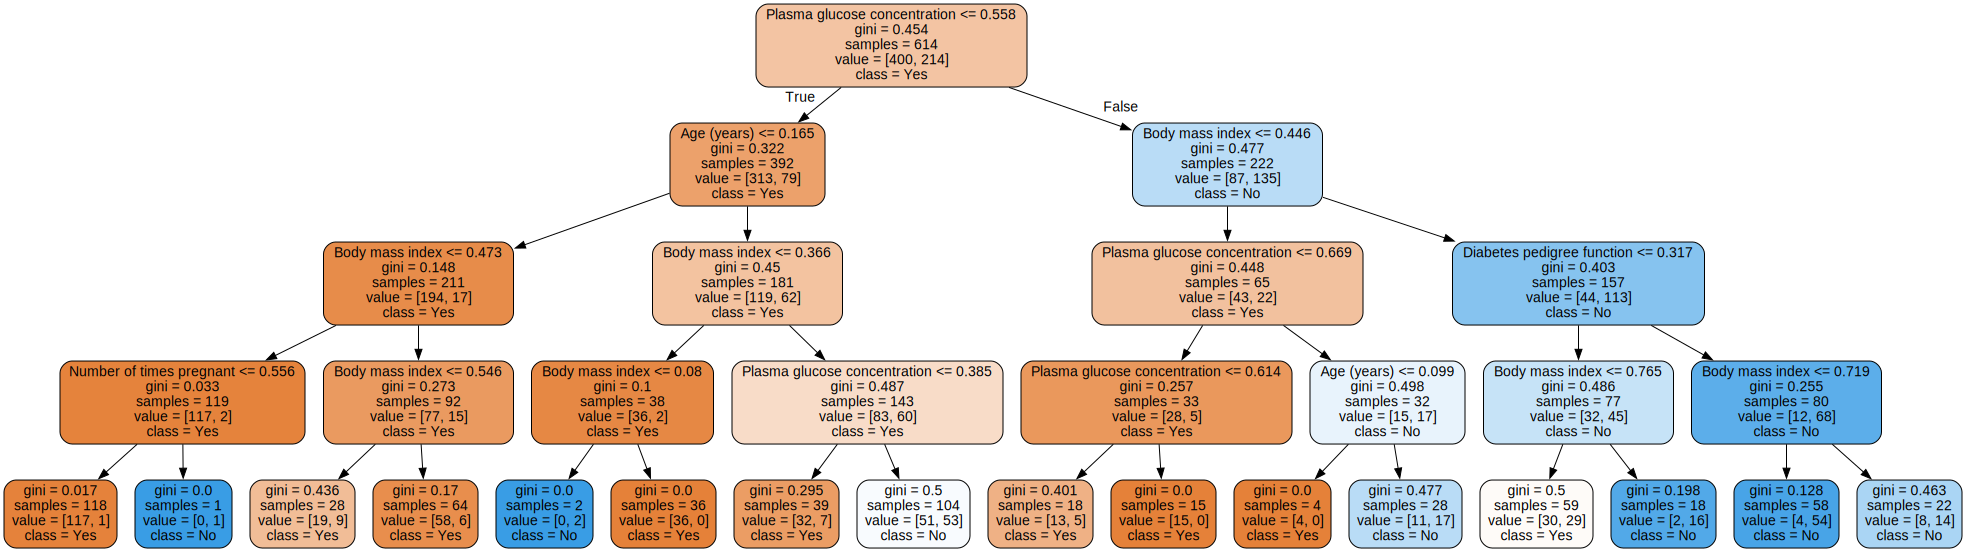

In [45]:
graph = graphviz.Source(dot_data)
graph

In [46]:
# Prediction on Train Data

preds_train = DT_best.predict(X_train)
preds_train

array(['YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES',
       'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO',
       'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO',
       'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES',
       'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO',
       'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
    

In [47]:
# Confusion Matrix
pd.crosstab(Y_train, preds_train, rownames = ['Actual'], colnames = ['Predictions'])

Predictions,NO,YES
Actual,,
NO,324,76
YES,57,157


In [48]:
# Accuracy
print(accuracy_score(Y_train, preds_train))

0.7833876221498371


[Text(0.5, 1.0, 'Sales Classification Confusion Matrix(Train)'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

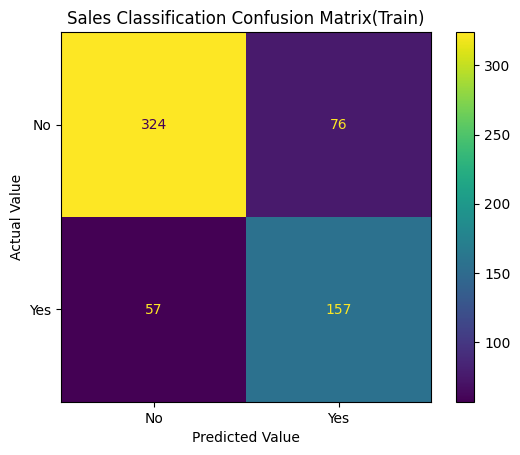

In [49]:
# Confusion Matrix - Heat Map
cm = skmet.confusion_matrix(Y_train, preds_train)
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cmplot.plot()
cmplot.ax_.set(title = 'Sales Classification Confusion Matrix(Train)', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

# Model Training with Cross Validation

In [50]:
from sklearn.model_selection import cross_validate


def cross_validation(model, _X, _y, _cv=5):
    
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
          This is the machine learning algorithm to be used for training.
    _X: array
       This is the matrix of features.
    _y: array
       This is the target variable.
    _cv: int, default=5
      Determines the number of folds for cross-validation.
    Returns
    -------
    The function returns a dictionary containing the metrics 'accuracy', 'precision',
    'recall', 'f1' for both training set and validation set.
    '''
    _scoring = ['accuracy', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                           X=_X,
                           y=_y,
                           cv=_cv,
                           scoring=_scoring,
                           return_train_score=True)

    return pd.DataFrame({"Training Accuracy scores": results['train_accuracy'],
          "Mean Training Accuracy": results['train_accuracy'].mean()*100,
          "Training Precision scores": results['train_precision'],
          "Mean Training Precision": results['train_precision'].mean(),
          "Training Recall scores": results['train_recall'],
          "Mean Training Recall": results['train_recall'].mean(),
          "Training F1 scores": results['train_f1'],
          "Mean Training F1 Score": results['train_f1'].mean(),
          "Validation Accuracy scores": results['test_accuracy'],
          "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
          "Validation Precision scores": results['test_precision'],
          "Mean Validation Precision": results['test_precision'].mean(),
          "Validation Recall scores": results['test_recall'],
          "Mean Validation Recall": results['test_recall'].mean(),
          "Validation F1 scores": results['test_f1'],
          "Mean Validation F1 Score": results['test_f1'].mean()
          })

In [51]:
from sklearn.preprocessing import LabelEncoder  # labelencoder is applied for target variable
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(Y_train)

label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))

print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")
print("Label Encoded Target Variable", encoded_y, sep="\n")

Mapping of Label Encoded Classes
{'NO': 0, 'YES': 1}
Label Encoded Target Variable
[1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0
 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0
 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1
 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1
 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 

In [52]:
decision_tree_result = cross_validation(DT_best, X_train, encoded_y, 5)
decision_tree_result

,Training Accuracy scores,Mean Training Accuracy,Training Precision scores,Mean Training Precision,Training Recall scores,Mean Training Recall,Training F1 scores,Mean Training F1 Score,Validation Accuracy scores,Mean Validation Accuracy,Validation Precision scores,Mean Validation Precision,Validation Recall scores,Mean Validation Recall,Validation F1 scores,Mean Validation F1 Score
0,0.796334,81.025284,0.685864,0.731504,0.766082,0.728934,0.723757,0.727387,0.731707,73.929095,0.619048,0.628805,0.604651,0.625914,0.611765,0.626819
1,0.812627,81.025284,0.792593,0.731504,0.625731,0.728934,0.699346,0.727387,0.747967,73.929095,0.650000,0.628805,0.604651,0.625914,0.626506,0.626819
2,0.806517,81.025284,0.726190,0.731504,0.713450,0.728934,0.719764,0.727387,0.788618,73.929095,0.697674,0.628805,0.697674,0.625914,0.697674,0.626819
3,0.806517,81.025284,0.700000,0.731504,0.777778,0.728934,0.736842,0.727387,0.764228,73.929095,0.666667,0.628805,0.651163,0.625914,0.658824,0.626819
4,0.829268,81.025284,0.752874,0.731504,0.761628,0.728934,0.757225,0.727387,0.663934,73.929095,0.510638,0.628805,0.571429,0.625914,0.539326,0.626819


In [53]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

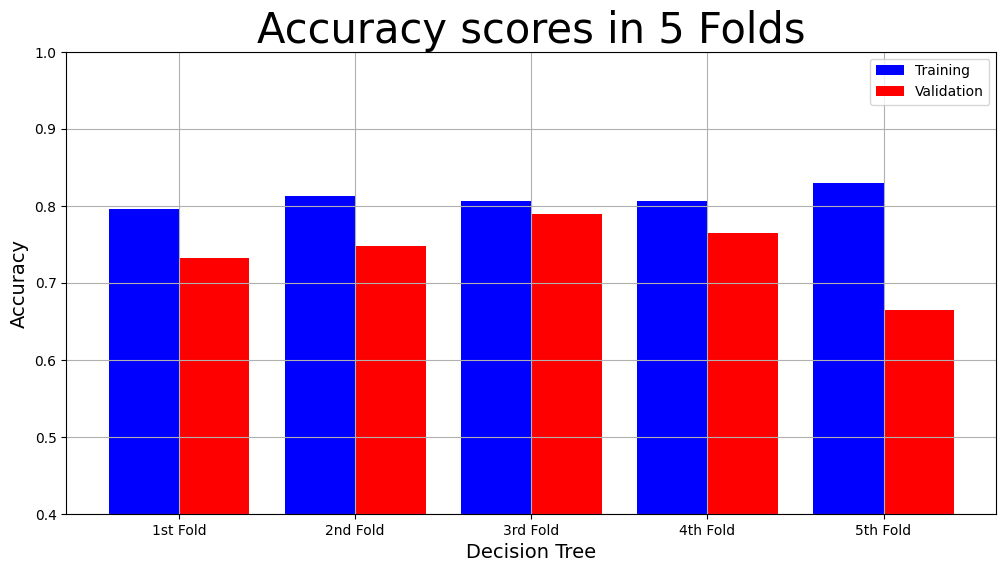

In [54]:
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

## Random Forest Classifier

In [55]:
# creating random forest classifier
clf = RandomForestClassifier(n_estimators = 100)

In [56]:
# Training the model on the training dataset
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [57]:
# predictions on the test dataset
y_pred = clf.predict(X_test)
y_pred

array(['NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES',
       'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES',
       'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO',
       'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES',
 

In [58]:
print(accuracy_score(Y_test, y_pred))

0.8116883116883117


In [59]:
# Confusion Matrix
pd.crosstab(Y_test, y_pred, rownames = ['Actual'], colnames = ['Predictions']) 

Predictions,NO,YES
Actual,,
NO,90,10
YES,19,35


[Text(0.5, 1.0, 'Sales Classification Confusion Matrix(Train)'),
 Text(0.5, 0, 'Predicted Value'),
 Text(0, 0.5, 'Actual Value')]

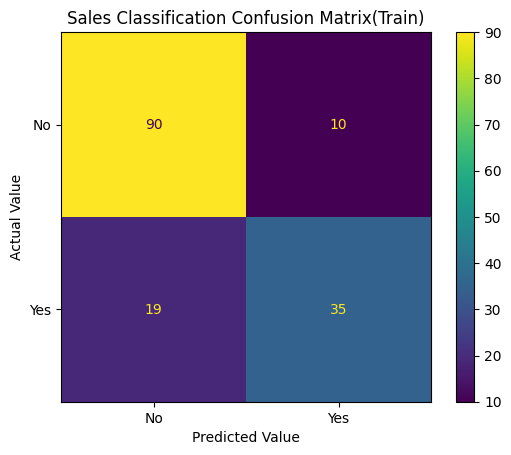

In [60]:
# Confusion Matrix - Heat Map
cm = skmet.confusion_matrix(Y_test, y_pred)
cmplot = skmet.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['No', 'Yes'])
cmplot.plot()
cmplot.ax_.set(title = 'Sales Classification Confusion Matrix(Train)', 
               xlabel = 'Predicted Value', ylabel = 'Actual Value')

In [61]:
# Number of trees in random forest
n_estimators = np.linspace(100, 3000, int((3000-100)/200) + 1, dtype=int)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [1, 5, 10, 20, 50, 75, 100, 150, 200]
# Minimum number of samples required to split a node
# min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 9)]
min_samples_split = [1, 2, 5, 10, 15, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

### Hyperparameter Optimization

In [62]:
rf_base = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_base,
                               param_distributions = random_grid,
                               n_iter = 30, cv = 5,
                               verbose=2,
                               random_state=42, n_jobs = 4)

In [63]:
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 5, 10, 20, 50, 75, 100,
                                                      150, 200],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 5, 10, 15,
                                                              20, 30],
                                        'n_estimators': array([ 100,  307,  514,  721,  928, 1135, 1342, 1550, 1757, 1964, 2171,
       2378, 2585, 2792, 3000])},
                   random_state=42, verbose=2)

In [64]:
rf_random.best_params_

{'n_estimators': 1757,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_depth': 150,
 'criterion': 'gini',
 'bootstrap': False}

In [65]:
print (rf_random.score(X_train, Y_train))

0.9381107491856677


In [66]:
print (rf_random.score(X_test, Y_test))

0.8051948051948052
